<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа» - Множественное тестирование</b></h3>


## Импорт библиотек

In [2]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats

## Импорт данных

In [3]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=False)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 10)


,id,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
0,0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, опираясь уже **НЕ** только на визуализацию. Само задание выполнить на языке **Python**.
   

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить (drop_duplicates). 
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (dropna())
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Сколько их?

In [4]:
data.duplicated().sum() # no duplicates

0

In [5]:
data.dropna(axis=1, inplace = True) # remove columns with nan values

In [6]:
q75 = np.percentile(data.home_cost, 75)  # определяем 75 перцентиль
q25 = np.percentile(data.home_cost, 25)  # определяем 25 перцентиль
intr_qr = q75-q25                        # определяем межквартильный диапазон
max = q75+(1.5*intr_qr)                  # оцениваем верхнюю границу
min = q25-(1.5*intr_qr)                  # оцениваем нижнюю границу

for x in ['home_cost']:                  # для каждой строки из home_cost
    data.loc[data[x] < min,x] = np.nan   # присвоение знания nan значениям ниже min
    data.loc[data[x] > max,x] = np.nan   # присвоение знания nan значениям выше max

In [7]:
data.dropna(inplace = True) # удаляем выбросы

In [8]:
data.shape # удалили 13 выбросов

(5987, 9)

# Проверка гипотез

<div class="alert alert-info">

<b>Задание:</b>    
    
Перед вами уже знакомый датасет, который был дан в прошлых домашних заданиях. Вы уже научились применить подходящий статистический критерий для двух групп, теперь вам предстоит научиться верно применять критерии для нескольких групп одновременно. 
    

<div class="alert alert-warning">
    
##  Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

In [9]:
df_task1 = data.loc[data['profession'].isin(['Homemaker', 'Marketing', 'Healthcare', 'Executive'])] # select categories

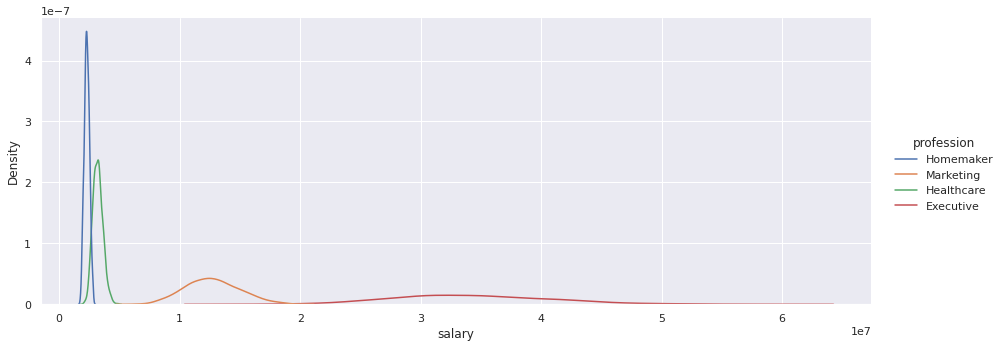

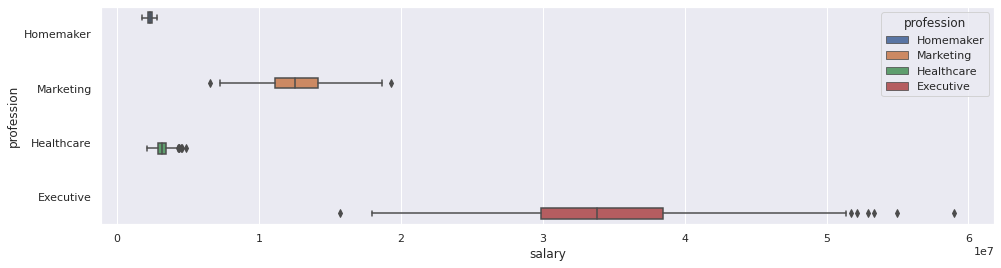

In [56]:
# Гистограммы со сглаживанием
sns.displot(df_task1, x="salary", hue="profession", height=5, aspect=2.5, kind="kde");

# Бокс-плоты
plt.figure(figsize=(16, 4))
sns.boxplot(data=df_task1, y="profession", x="salary", hue="profession");

С помощью теста Шапиро-Уилка проверим на нормальность распределения:

In [11]:
professions = df_task1.profession.unique()
for i in professions:
    temp_df = df_task1.loc[df_task1['profession'] == i].salary    
    stat, p_value = stats.shapiro(temp_df)
    alpha = 0.05
    if p_value > alpha:
      print(f'Распределение {i} нормальное')
    else:  
      print(f'Распределение {i} не нормальное')
    print(f'p-value = {round(p_value,3)}') 

Распределение Homemaker не нормальное
p-value = 0.046
Распределение Marketing не нормальное
p-value = 0.043
Распределение Healthcare не нормальное
p-value = 0.001
Распределение Executive не нормальное
p-value = 0.002


Как видим все 4 распределения не являются нормальными, поэтому используем Критерий Краскела — Уоллиса

In [12]:
Homemaker = data[data["profession"] == "Homemaker"].salary
Marketing = data[data["profession"] == "Marketing"].salary
Healthcare = data[data["profession"] == "Healthcare"].salary
Executive = data[data["profession"] == "Executive"].salary


In [13]:
statistic, pvalue = stats.kruskal(Healthcare, Homemaker, Marketing, Executive)

print(f'statistic = {round(statistic,3)}, p-value = {round(pvalue,3)}')
alpha = 0.05
if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

statistic = 2486.836, p-value = 0.0
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо


* Зарплаты выбранных категорий отличаются и это отличие статистически значимо



<div class="alert alert-warning">
    
#  Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

In [14]:
df_task2 = data.loc[data['profession'].isin(['Doctor', 'Entertainment', 'Lawyer'])] # select categories

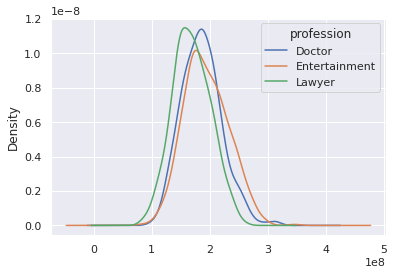

In [15]:
df_task2[['profession','salary']].pivot(index = None, columns='profession', values='salary').plot.kde();

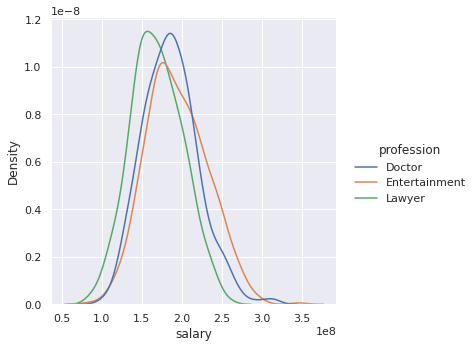

In [51]:
# Гистограммы со сглаживанием (почему такой график получается ?)
sns.displot(df_task2, x="salary", hue="profession", kind = 'kde', common_norm = False);

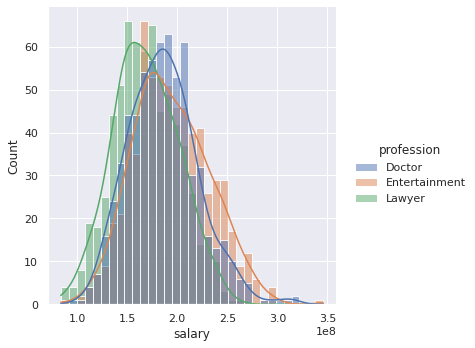

In [ ]:
sns.displot(df_task2, x="salary", hue="profession", kde = True);

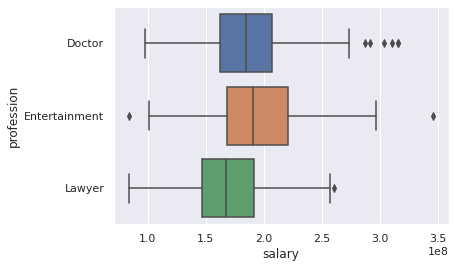

In [ ]:
sns.boxplot(data=df_task2, y="profession", x="salary");

In [ ]:
professions = df_task2.profession.unique() 
for i in professions: # проверка на нормальность
    temp_df = df_task2.loc[df_task2['profession'] == i].salary    
    stat, p_value = stats.shapiro(temp_df)
    alpha = 0.05
    if p_value > alpha:
      print(f'Распределение {i} нормальное')
    else:  
      print(f'Распределение {i} не нормальное')
    print(f'p-value = {round(p_value,3)}') 

Распределение Doctor не нормальное
p-value = 0.0
Распределение Entertainment не нормальное
p-value = 0.003
Распределение Lawyer нормальное
p-value = 0.1


Только 1 распределение нормальное, поэтому снова применяем критерий Краскелла-
Уолисса

In [ ]:
Doctor = data[data["profession"] == "Doctor"].salary
Entertainment = data[data["profession"] == "Entertainment"].salary
Lawyer = data[data["profession"] == "Lawyer"].salary

In [ ]:
statistic, pvalue = stats.kruskal(Doctor, Entertainment, Lawyer)

print(f'statistic = {round(statistic,3)}, p-value = {round(pvalue,3)}')
alpha = 0.05
if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разные распределения (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

statistic = 150.499, p-value = 0.0
Разные распределения (отклоняем H0)
Выборки отличаются статистически значимо


* Несмотря на похожесть визуально, распределения статистически значимо различаются




<div class="alert alert-warning">
    
# Допустим вы рассматриваете 4 группы населения, отличающихся количеством       детей. Группы следующие.
#    **A** - нет детей
#    **B** - 1 ребенок
#    **C** - от 2 до 4 детей
#    **D** - от 5 детей    
#      
#      
#    Правда ли, что эти группы отличаются статистически значимо по уровню       дохода   и   уровню счастья? Ответ поддержите статистическими критериями и  визуализацией

In [ ]:
data['number_children'] = pd.cut(data.children, 
       bins=[-1, 0, 1, 4, 9], 
       labels=['0', '1', '2-4','more_5']) # добавляем столбец количества детей number_children     

Начнем с уровня дохода


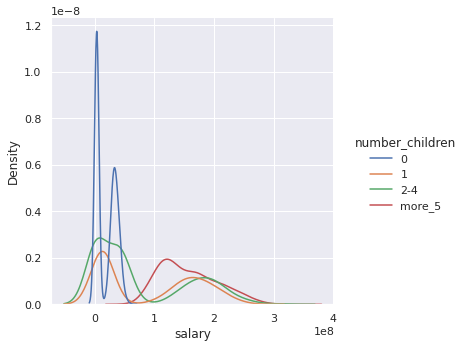

In [ ]:
sns.displot(data, x="salary", hue="number_children", kind='kde');# распределения далеки от нормальных, сразу переходим к параметру Краскелла-Уоллиса

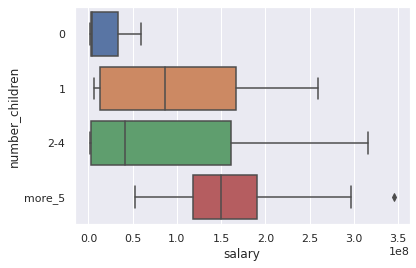

In [ ]:
sns.boxplot(data=data, y="number_children", x="salary")

In [ ]:
zero = data[data["number_children"] == "0"].salary
one = data[data["number_children"] == "1"].salary
two_four = data[data["number_children"] == "2-4"].salary
more_5 = data[data["number_children"] == "more_5"].salary

In [ ]:
statistic, pvalue = stats.kruskal(zero, one, two_four, more_5)

print(f'statistic = {round(statistic,3)}, p-value = {round(pvalue,3)}')
alpha = 0.05
if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разные распределения (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

statistic = 1747.347, p-value = 0.0
Разные распределения (отклоняем H0)
Выборки отличаются статистически значимо


Перейдем к уровню счастья

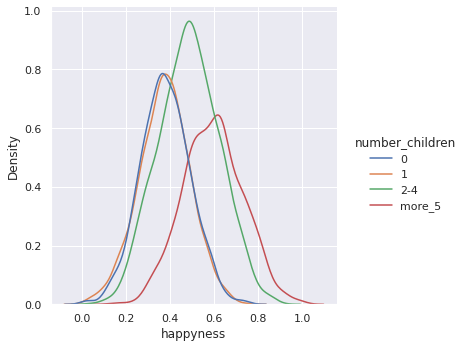

In [ ]:
sns.displot(data, x="happyness", hue="number_children", kind='kde')

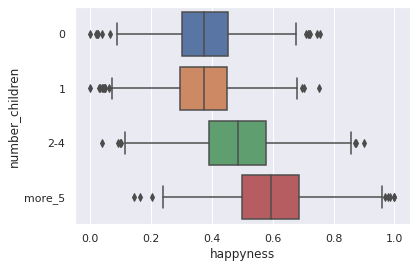

In [ ]:
sns.boxplot(data=data, y="number_children", x="happyness");

In [ ]:
numbers_children = data.number_children.unique() 
for i in numbers_children: # проверка на нормальность
    temp_df = data.loc[data['number_children'] == i].happyness    
    stat, p_value = stats.shapiro(temp_df)
    alpha = 0.05
    if p_value > alpha:
      print(f'Распределение {i} нормальное')
    else:  
      print(f'Распределение {i} не нормальное')
    print(f'p-value = {round(p_value,3)}') 

Распределение 2-4 нормальное
p-value = 0.075
Распределение more_5 нормальное
p-value = 0.447
Распределение 1 нормальное
p-value = 0.207
Распределение 0 нормальное
p-value = 0.741


Все распределения нормальные, можем применять дисперсионный анализ

In [ ]:
statistic, pvalue = stats.f_oneway(zero, one, two_four, more_5)

print(f'statistic = {round(statistic,3)}, p-value = {round(pvalue,3)}')
alpha = 0.05
if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разные распределения (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

statistic = 1021.001, p-value = 0.0
Разные распределения (отклоняем H0)
Выборки отличаются статистически значимо


Да, группы статистически значимо различаются как по уровню дохода, так и по уровню счастья